<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-правильност-расчетов-эффективности-обогащения" data-toc-modified-id="Проверка-правильност-расчетов-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка правильност расчетов эффективности обогащения</a></span></li><li><span><a href="#Анализ-различия-признаков-в-тренировочной-и-тестовой-выборках" data-toc-modified-id="Анализ-различия-признаков-в-тренировочной-и-тестовой-выборках-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ различия признаков в тренировочной и тестовой выборках</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-различных-моделей-и-оценка-их-качества-кросс-валидацией" data-toc-modified-id="Обучение-различных-моделей-и-оценка-их-качества-кросс-валидацией-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение различных моделей и оценка их качества кросс-валидацией</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

### План работы:

  - Подготовить данные, убедиться, что расчеты верные
  - Провести предобработку данных, проанализировать признаки
  - проанализировать данные, т.е. посмотреть как менялась концентрация, размер гранул на различных этапах
  - построить модели обучения и выбрать лучшую из них

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from scipy import stats as st

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df_train = pd.read_csv('C:/Users/Денис/Desktop/Проекты/Zolotodobicha/gold_recovery_train_new.csv')
df_test = pd.read_csv('C:/Users/Денис/Desktop/Проекты/Zolotodobicha/gold_recovery_test_new.csv')
df_full = pd.read_csv('C:/Users/Денис/Desktop/Проекты/Zolotodobicha/gold_recovery_full_new.csv')

df_train.info()
df_test.info()
df_full.info()

display(df_train.head())
display(df_test.head())
display(df_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


При первичном просмотре данных довольно много, и во многих строках присутсвуют пропуски, с ними мы разберемся позже. Также очевидно, что датасет фулл - это общий датасет из которого, по каким-то признакам получили два датасета для тестовой и обучающей выборки, причем не все парметры вошли в тестовый датасет. Их проанализируем чуть позже.

### Проверка правильност расчетов эффективности обогащения

In [4]:
#Создадим выборку с посчитанными результатами из датасета
recovery_train = df_train['rougher.output.recovery']
recovery_train[:5]

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Формула:

Recovery = (C * (F-T) / F * (C-T)) * 100%, где:

  - C — доля золота в концентрате после флотации/очистки;  
  - F — доля золота в сырье/концентрате до флотации/очистки; 
  - T — доля золота в отвальных хвостах после флотации/очистки. 

Тогда для нашей таблицы: С - rougher.output.concentrate_au; F - rougher.input.feed_au; T - rougher.output.tail_au
  

In [5]:
#Рассчитаем коэффециент обогащения золота, согласно формуле выше
recovery = ((df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - 
                                                          df_train['rougher.output.tail_au'])) / 
            (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - 
                                                  df_train['rougher.output.tail_au'])))*100

recovery[:5]

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [6]:
#Рассчитаем МАЕ между рассчетами и значениями признака из сета, с округлением до 2 знака
MAE = mean_absolute_error(recovery, recovery_train).round(2)
print('Средняя абсолютная ошибка:', MAE)

Средняя абсолютная ошибка: 0.0


In [7]:
#длячернового концентрата рассчитали, теперь проверим для финального продукта
recovery_final = ((df_train['final.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - 
                                                          df_train['final.output.tail_au'])) / 
            (df_train['rougher.input.feed_au'] * (df_train['final.output.concentrate_au'] - 
                                                  df_train['final.output.tail_au'])))*100

recovery_final[:5]

0    70.541216
1    69.266198
2    68.116445
3    68.347543
4    66.927016
dtype: float64

In [8]:
recovery_train_final = df_train['final.output.recovery']
recovery_train_final[:5]

0    70.541216
1    69.266198
2    68.116445
3    68.347543
4    66.927016
Name: final.output.recovery, dtype: float64

In [9]:
#Рассчитаем МАЕ 
MAE = mean_absolute_error(recovery_final, recovery_train_final).round(2)
print('Средняя абсолютная ошибка:', MAE)

Средняя абсолютная ошибка: 0.0


Результаты в исходном датасете посчитаны верно.

### Анализ различия признаков в тренировочной и тестовой выборках

In [10]:
#cоздадим список с названиями колонок, которые нужно удалить
to_drop = df_test.columns
#удалим дублирующиеся столбцы из таблицы,  чтобы можно было посмотреть и проанализировать признаки различия между таблицами
with_drop = df_train.drop(to_drop, axis=1)
with_drop.info()
with_drop[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


- final.output - конечные параметры в концентрате и хвостах, а также эффективность обогащения продукта после всего процесса.
- primary_cleaner.output - аналогично написанному выше, за исключением того, что параметры приведены после первичной очистки.
- secondary_cleaner.output - после вторичной очистки.
- rougher.output - после этапа флотации.
- rougher.calculation - рассчитанные параметры для этапа флотации.

Как мы видим, различия между тестовой и тренировочной выборкой заключаются в том, что в тестовом датасете отсутствуют рассчетные параметры, либо параметры полученные непосредственно после какого-либо этапа. Очевидно, что данные парметры сложно получить/измерить во время выполнения технологического процесса. Сделано, это очевидно для того, чтобы сделанная нами модель прогнозировала результат, для различных этапов, тлько по входящим параметрам.

### Предобработка данных

In [11]:
#для начала заменим все пропуски.
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

df_train.info()
df_test.info()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [12]:
# также заменим тип данных в столбцах date на datetime

df_train['date'] = pd.to_datetime(df_train['date'], format='%Y.%m.%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y.%m.%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y.%m.%d %H:%M:%S')



## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки


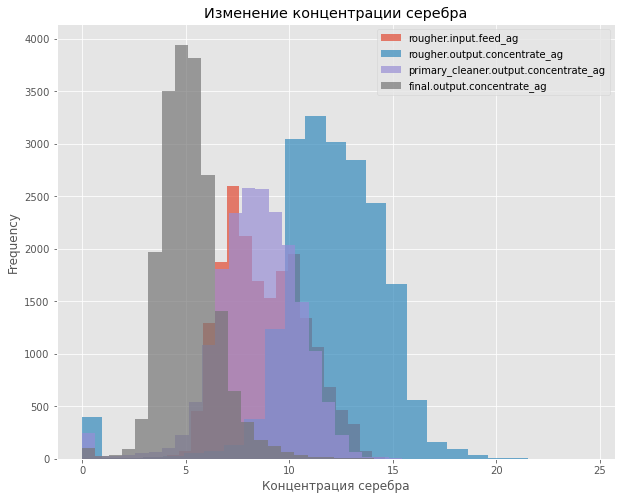

In [13]:
#Построим график распределения концентрации Серебра

plt.style.use('ggplot')

df_full['rougher.input.feed_ag'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['rougher.output.concentrate_ag'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['primary_cleaner.output.concentrate_ag'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['final.output.concentrate_ag'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))

plt.legend(['rougher.input.feed_ag', 
            'rougher.output.concentrate_ag', 
            'primary_cleaner.output.concentrate_ag', 
            'final.output.concentrate_ag'])
plt.title('Изменение концентрации серебра')
plt.xlabel('Концентрация серебра')


plt.show()

На графике красным цветом изображена концентрация серебра в исходном сырье. По графику видно, что после этапа флотации мы получаем продукт с наивысшим содержанием серебра, в дальнейшем с каждым новым этапом очистки концентрация серебра снижается. В финальной версии продукта(обозначено черным) мы получаем концентрацию серебра ниже, чем в исходном сырье.


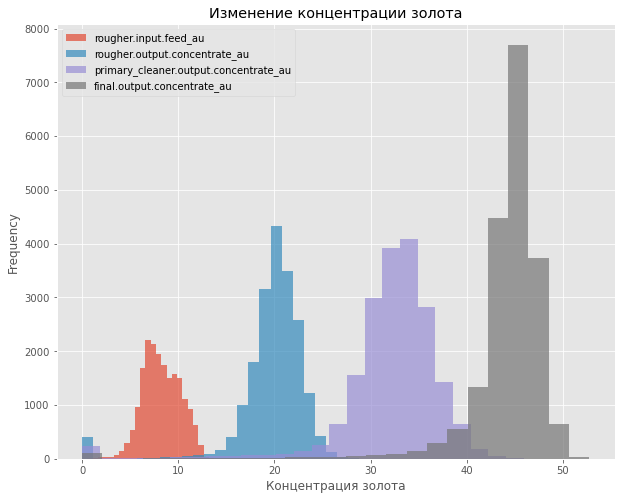

In [14]:
# для золота

df_full['rougher.input.feed_au'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['rougher.output.concentrate_au'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['primary_cleaner.output.concentrate_au'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['final.output.concentrate_au'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))

plt.legend(['rougher.input.feed_au', 
            'rougher.output.concentrate_au', 
            'primary_cleaner.output.concentrate_au', 
            'final.output.concentrate_au'])
plt.title('Изменение концентрации золота')
plt.xlabel('Концентрация золота')


plt.show()

С золотом дела обстоят иначе, по сравнению с концентрацией в исходном сырье (обозначено красным), после каждого этапа очистки, концентрация золота в продукте постепенно увеличивается, в итоге на выходе, мы получаем продукт с наивысшей концентрацией золота.

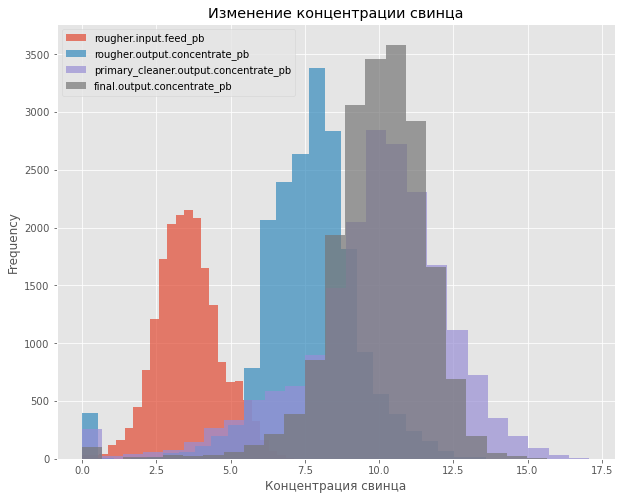

In [15]:
# для свинца

df_full['rougher.input.feed_pb'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['rougher.output.concentrate_pb'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['primary_cleaner.output.concentrate_pb'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))
df_full['final.output.concentrate_pb'].plot.hist(alpha=0.7, legend=True, bins=25, figsize=(10,8))

plt.legend(['rougher.input.feed_pb', 
            'rougher.output.concentrate_pb', 
            'primary_cleaner.output.concentrate_pb', 
            'final.output.concentrate_pb'])
plt.title('Изменение концентрации свинца')
plt.xlabel('Концентрация свинца')


plt.show()

По графику видно, что на концентрацию свинца в продукте практически не влияют этапы очистки. После каждого этапа, его процентное содержание в продукте практически не меняется.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Посмотрим на распределение и средние значения гранул сырья после первичной обработки

In [16]:
def size_prim (df,  name):
    plt.figure(figsize=(16,5))
    sns.rugplot(df)
    sns.kdeplot(df)
    
    plt.title(name, fontsize=16)
    plt.xlim(5, 12)
    plt.ylabel('Фракция', labelpad=15, fontsize=14)
    plt.show()

    print(name, 'среднее:', df.mean())
    print(name, 'медиана:', df.median())

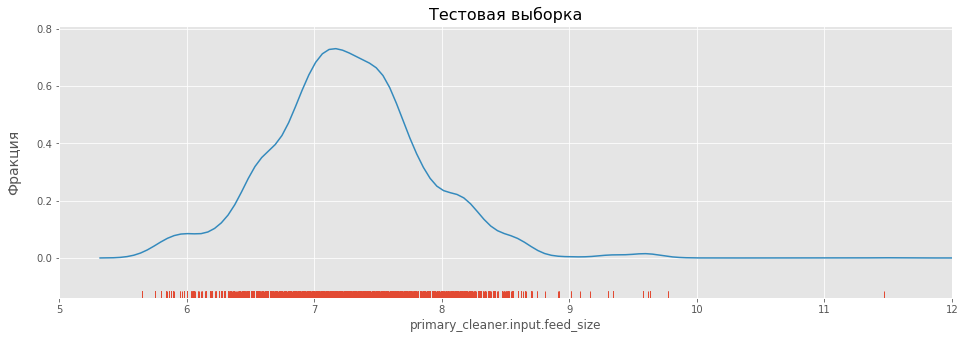

Тестовая выборка среднее: 7.266339191270909
Тестовая выборка медиана: 7.25


In [17]:
size_prim(df_test['primary_cleaner.input.feed_size'], 'Тестовая выборка')

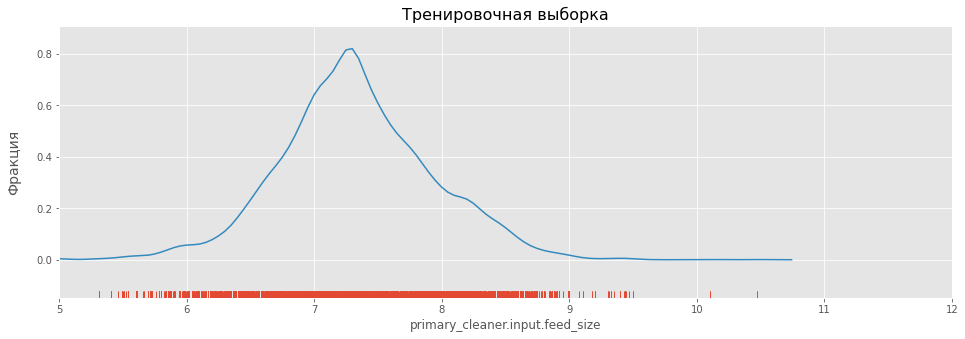

Тренировочная выборка среднее: 7.322309906901298
Тренировочная выборка медиана: 7.289999961853027


In [18]:
size_prim(df_train['primary_cleaner.input.feed_size'], 'Тренировочная выборка')

Проделаем тоже самое но для этапа флотации

In [19]:
#проделаем тоже самое но для этапа флотации
df_train['rougher.input.feed_size'].mean()

60.23985599255736

In [20]:
df_test['rougher.input.feed_size'].mean()

55.95275402889511

In [21]:
def size_roug (df,  name):
    plt.figure(figsize=(16,5))
    sns.rugplot(df)
    sns.kdeplot(df)
    sns.set(style='darkgrid')
    plt.title(name, fontsize=16)
    plt.xlim(20, 110)
    plt.ylabel('Фракция', labelpad=15, fontsize=14)
    plt.show()

    print(name, 'среднее:', df.mean())
    print(name, 'медиана:', df.median())

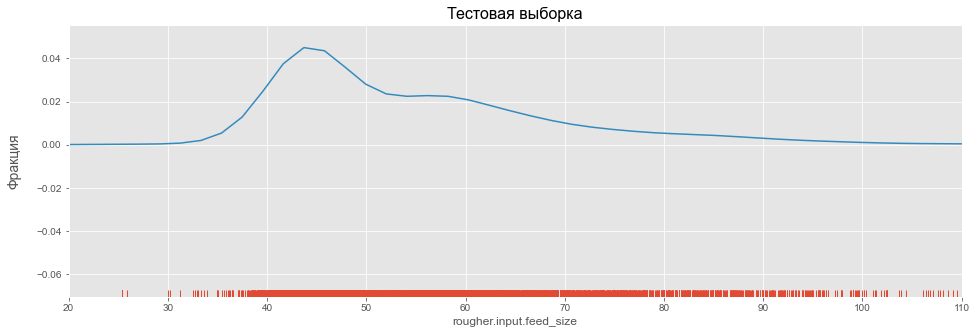

Тестовая выборка среднее: 55.95275402889511
Тестовая выборка медиана: 50.8468431600362


In [22]:
size_roug(df_test['rougher.input.feed_size'], 'Тестовая выборка')

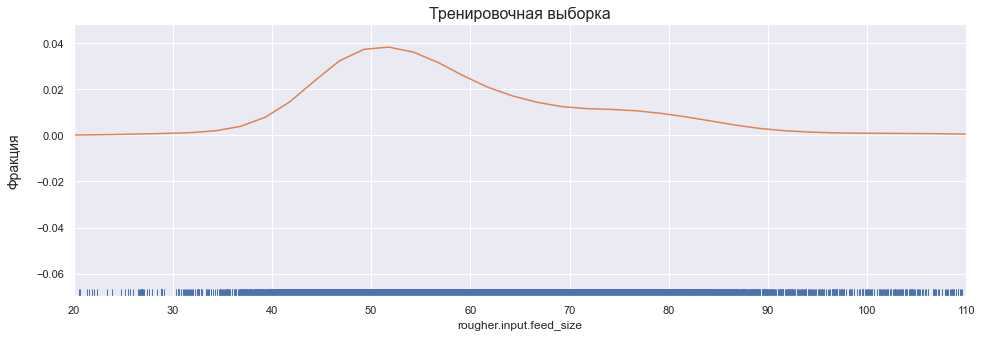

Тренировочная выборка среднее: 60.23985599255736
Тренировочная выборка медиана: 55.269783890501536


In [23]:
size_roug(df_train['rougher.input.feed_size'], 'Тренировочная выборка')

Размеры отличаются, внешне графики хоть и схожи, однако отличия есть, вероятно влияние выбросов, отбросим их и посмотрим на распределение.

In [24]:
df_train = df_train.loc[df_train['rougher.input.feed_size'] <= 100].reset_index(drop=True)
df_train[:3]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


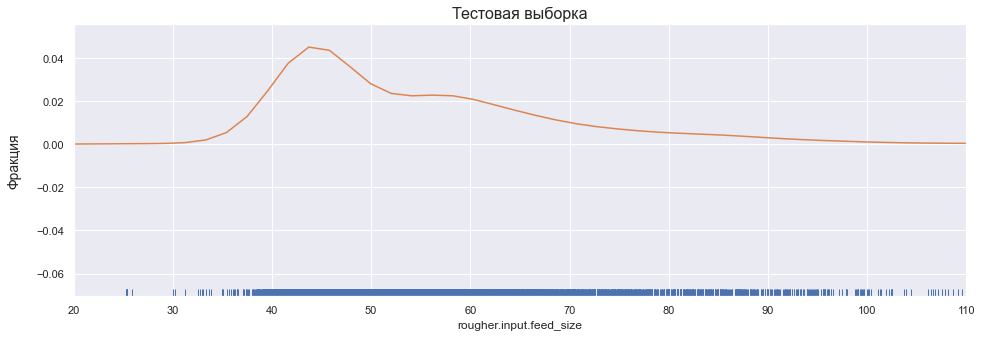

Тестовая выборка среднее: 55.95275402889511
Тестовая выборка медиана: 50.8468431600362


In [25]:
size_roug(df_test['rougher.input.feed_size'], 'Тестовая выборка')

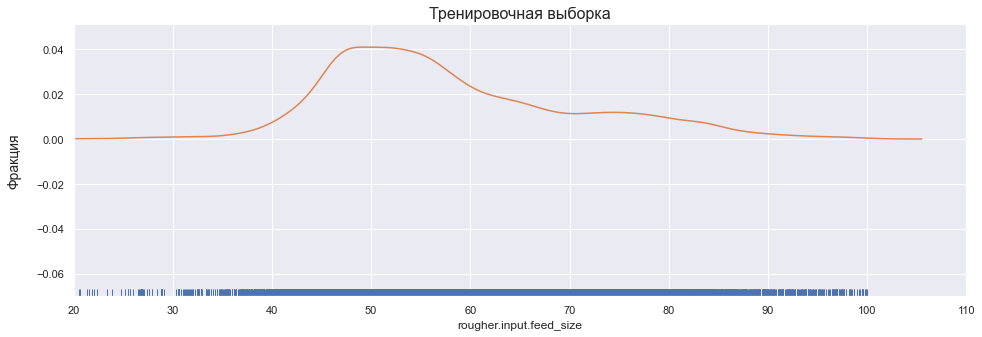

Тренировочная выборка среднее: 57.883165227639815
Тренировочная выборка медиана: 55.11055033407039


In [26]:
size_roug(df_train['rougher.input.feed_size'], 'Тренировочная выборка')

Значения приблизились друг к другу, можно, конечно, фиксить и еще, однако плотность распределения близка, оставим так, с учетом, что возможна ошибка в обучении.

In [27]:
#изменим значения в таблице фулл
df_full = df_full.loc[df_full['rougher.input.feed_size'] <= 100].reset_index(drop=True)
df_full[:3]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


### Исследование суммарной концентрации всех веществ на разных стадиях

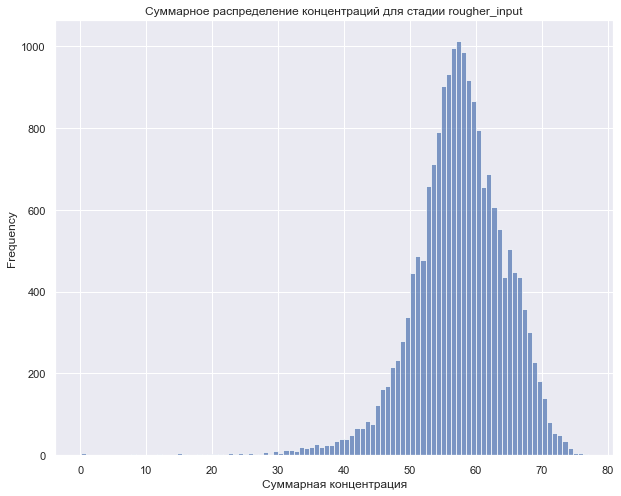

In [28]:
#в сырье
rougher_input = ['rougher.input.feed_au',
                 'rougher.input.feed_ag',
                 'rougher.input.feed_pb',
                 'rougher.input.feed_sol']
df_full[rougher_input].sum(axis=1).plot.hist(alpha=0.7, bins=100, figsize=(10,8))

plt.title('Суммарное распределение концентраций для стадии rougher_input')
plt.xlabel('Cуммарная концентрация')

plt.show()

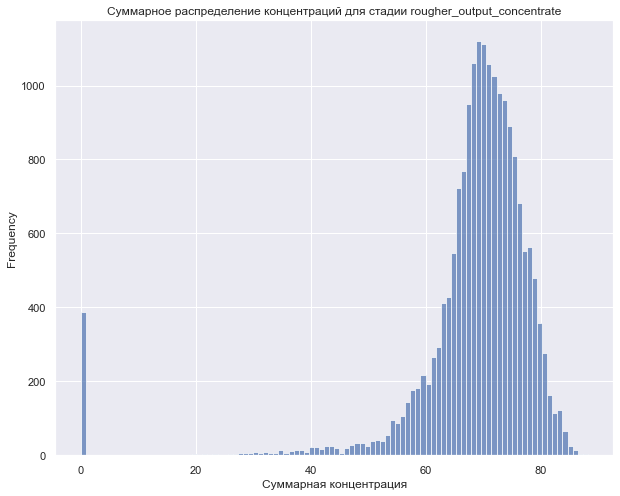

In [29]:
#в черновой стадии
rougher_output_concentrate = ['rougher.output.concentrate_au',
                 'rougher.output.concentrate_ag',
                 'rougher.output.concentrate_pb',
                 'rougher.output.concentrate_sol']
df_full[rougher_output_concentrate].sum(axis=1).plot.hist(alpha=0.7, bins=100, figsize=(10,8))

plt.title('Суммарное распределение концентраций для стадии rougher_output_concentrate')
plt.xlabel('Cуммарная концентрация')

plt.show()

In [30]:
#удалим выбросы
df_full['conc_sum'] = df_full[rougher_output_concentrate].sum(axis=1)
df_full = df_full.loc[df_full['conc_sum'] >= 10].reset_index(drop=True)
df_full = df_full.drop('conc_sum', 1)

In [31]:
#в тренировочном датасете
df_train['conc_sum'] = df_train[rougher_output_concentrate].sum(axis=1)
df_train = df_train.loc[df_train['conc_sum'] >= 10].reset_index(drop=True)
df_train = df_train.drop('conc_sum', 1)

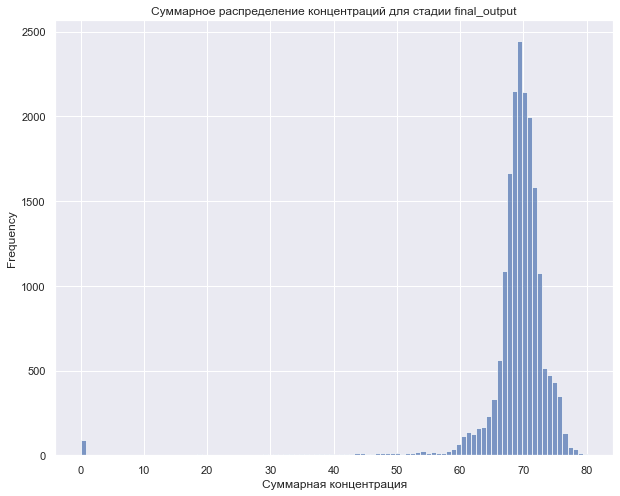

In [32]:
#Для финальной стадии
final_output= ['final.output.concentrate_au',
                 'final.output.concentrate_ag',
                 'final.output.concentrate_pb',
                 'final.output.concentrate_sol']
df_full[final_output].sum(axis=1).plot.hist(alpha=0.7, bins=100, figsize=(10,8))

plt.title('Суммарное распределение концентраций для стадии final_output')
plt.xlabel('Cуммарная концентрация')

plt.show()

In [33]:
df_full['conc_sum'] = df_full[final_output].sum(axis=1)
df_full = df_full.loc[df_full['conc_sum'] >= 10].reset_index(drop=True)
df_full = df_full.drop('conc_sum', 1)

In [34]:
df_train['conc_sum'] = df_train[final_output].sum(axis=1)
df_train = df_train.loc[df_train['conc_sum'] >= 10].reset_index(drop=True)
df_train = df_train.drop('conc_sum', 1)

## Модель

### Функция для вычисления итоговой sMAPE

In [35]:
def sMAPE(y_target, y_predict):
    numerator = np.abs(y_target - y_predict)
    denominator = (np.abs(y_target) + np.abs(y_predict))/2
    divided = numerator/denominator
    return (divided.sum()/len(divided))*100

my_scorer = make_scorer(sMAPE, greater_is_better=False)   

### Обучение различных моделей и оценка их качества кросс-валидацией

Разделим признаки

In [36]:
features = df_train[df_test.columns].drop(['date'], 1)
target_rougher = df_train['rougher.output.recovery']
target_final = df_train['final.output.recovery']

In [37]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
#features_test = scaler.fit_transform(features_test)

Рандомный лес

In [38]:
#GridSearch
from sklearn.model_selection import GridSearchCV
model =RandomForestRegressor()
params = {'max_depth': range(2, 10, 3), 'n_estimators': range(2, 10, 3)}
gcv = GridSearchCV(model, params, cv=3, verbose=3, scoring=my_scorer)
gcv.fit(features, target_rougher)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=2, n_estimators=2;, score=-9.042 total time=   0.2s
[CV 2/3] END ......max_depth=2, n_estimators=2;, score=-5.714 total time=   0.1s
[CV 3/3] END ......max_depth=2, n_estimators=2;, score=-7.464 total time=   0.0s
[CV 1/3] END ......max_depth=2, n_estimators=5;, score=-9.158 total time=   0.6s
[CV 2/3] END ......max_depth=2, n_estimators=5;, score=-5.532 total time=   0.4s
[CV 3/3] END ......max_depth=2, n_estimators=5;, score=-7.779 total time=   0.3s
[CV 1/3] END ......max_depth=2, n_estimators=8;, score=-9.075 total time=   0.6s
[CV 2/3] END ......max_depth=2, n_estimators=8;, score=-5.512 total time=   0.6s
[CV 3/3] END ......max_depth=2, n_estimators=8;, score=-7.666 total time=   0.7s
[CV 1/3] END ......max_depth=5, n_estimators=2;, score=-8.665 total time=   0.3s
[CV 2/3] END ......max_depth=5, n_estimators=2;, score=-7.715 total time=   0.3s
[CV 3/3] END .....max_depth=5, n_estimators=2;, s

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 10, 3),
                         'n_estimators': range(2, 10, 3)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=3)

In [39]:
gcv.best_score_

-7.407026002141581

In [40]:
#Тестирование
test = df_test.merge(df_full[['date', 'rougher.output.recovery']], on='date', how='inner')
features_test = test.drop(columns=['date', 'rougher.output.recovery'])
test_rougher = test['rougher.output.recovery']
gcv.score(features_test, test_rougher)

-5.348019418616314

In [41]:
score_rougher = gcv.best_score_
score_rougher

-7.407026002141581

In [42]:
gcv.fit(features, target_final)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=2, n_estimators=2;, score=-9.736 total time=   0.0s
[CV 2/3] END ......max_depth=2, n_estimators=2;, score=-9.520 total time=   0.1s
[CV 3/3] END .....max_depth=2, n_estimators=2;, score=-11.842 total time=   0.0s
[CV 1/3] END ......max_depth=2, n_estimators=5;, score=-9.378 total time=   0.2s
[CV 2/3] END ......max_depth=2, n_estimators=5;, score=-9.774 total time=   0.3s
[CV 3/3] END .....max_depth=2, n_estimators=5;, score=-12.068 total time=   0.4s
[CV 1/3] END ......max_depth=2, n_estimators=8;, score=-9.404 total time=   0.4s
[CV 2/3] END ......max_depth=2, n_estimators=8;, score=-9.269 total time=   0.5s
[CV 3/3] END .....max_depth=2, n_estimators=8;, score=-11.483 total time=   0.5s
[CV 1/3] END ......max_depth=5, n_estimators=2;, score=-9.830 total time=   0.2s
[CV 2/3] END ......max_depth=5, n_estimators=2;, score=-9.615 total time=   0.2s
[CV 3/3] END .....max_depth=5, n_estimators=2;, s

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 10, 3),
                         'n_estimators': range(2, 10, 3)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=3)

In [43]:
score_final = gcv.best_score_
score_final

-10.052175020746718

In [44]:
smape_weighted = score_rougher*0.25 + score_final*0.75
smape_weighted

-9.390887766095435

In [45]:
gcv.best_params_

{'max_depth': 2, 'n_estimators': 8}

Линейная регрессия

In [46]:
model = LinearRegression()

scores_rougher = cross_val_score(model, features,target_rougher, cv=5, scoring=my_scorer)
mean_score_rougher = scores_rougher.mean()
print(mean_score_rougher)

scores_final = cross_val_score(model,features,target_final, cv=5, scoring=my_scorer)
mean_score_final = scores_final.mean()
print(mean_score_final)

smape_weighted = mean_score_rougher*0.25 + mean_score_final*0.75
print(smape_weighted)

-7.052625541374465
-11.139514084556438
-10.117791948760946


In [47]:
model =DecisionTreeRegressor()
params = {'max_depth': range(2, 10, 3)}
gcv = GridSearchCV(model, params, cv=5, verbose=3, scoring=my_scorer)
gcv.fit(features, target_rougher)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......................max_depth=2;, score=-7.687 total time=   0.1s
[CV 2/5] END ......................max_depth=2;, score=-7.307 total time=   0.0s
[CV 3/5] END ......................max_depth=2;, score=-5.422 total time=   0.1s
[CV 4/5] END ......................max_depth=2;, score=-6.026 total time=   0.1s
[CV 5/5] END ......................max_depth=2;, score=-7.779 total time=   0.0s
[CV 1/5] END ......................max_depth=5;, score=-8.860 total time=   0.2s
[CV 2/5] END ......................max_depth=5;, score=-7.676 total time=   0.2s
[CV 3/5] END ......................max_depth=5;, score=-6.059 total time=   0.2s
[CV 4/5] END ......................max_depth=5;, score=-4.855 total time=   0.2s
[CV 5/5] END ......................max_depth=5;, score=-7.229 total time=   0.3s
[CV 1/5] END ......................max_depth=8;, score=-9.882 total time=   0.5s
[CV 2/5] END ......................max_depth=8;, 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 10, 3)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=3)

In [48]:
score_rougher = gcv.best_score_
score_rougher

-6.84439267169858

In [49]:
gcv.fit(features, target_final)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......................max_depth=2;, score=-9.754 total time=   0.0s
[CV 2/5] END ......................max_depth=2;, score=-7.950 total time=   0.1s
[CV 3/5] END ......................max_depth=2;, score=-8.722 total time=   0.0s
[CV 4/5] END ......................max_depth=2;, score=-9.273 total time=   0.1s
[CV 5/5] END .....................max_depth=2;, score=-10.672 total time=   0.0s
[CV 1/5] END .....................max_depth=5;, score=-10.196 total time=   0.2s
[CV 2/5] END .....................max_depth=5;, score=-13.718 total time=   0.4s
[CV 3/5] END ......................max_depth=5;, score=-8.375 total time=   0.2s
[CV 4/5] END ......................max_depth=5;, score=-8.506 total time=   0.3s
[CV 5/5] END .....................max_depth=5;, score=-10.568 total time=   0.2s
[CV 1/5] END .....................max_depth=8;, score=-13.020 total time=   0.4s
[CV 2/5] END .....................max_depth=8;, s

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 10, 3)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=3)

In [50]:
score_final = gcv.best_score_
score_final

-9.274481764522438

In [51]:
smape_weighted = score_rougher*0.25 + score_final*0.75
smape_weighted

-8.666959491316474

In [52]:
gcv.best_params_

{'max_depth': 2}

Проверка модели на адекватность

In [53]:
#параметры для тестирования
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery' ]], on='date', how='inner')
features_test = df_test.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])
test_final = df_test['final.output.recovery']
test_rougher = df_test['rougher.output.recovery']

features_test = scaler.fit_transform(features_test)

In [54]:
#DummyModel
dmm = DummyRegressor()
dmm.fit(features, target_rougher)
pred = dmm.predict(features_test)
dmm_rougher = sMAPE(pred, test_rougher)
dmm_rougher

5.295861334034737

In [55]:
dmm.fit(features, target_final)
pred = dmm.predict(features_test)
dmm_final= sMAPE(pred, test_final)
dmm_final

8.422358510902017

In [56]:
smape_weighted = dmm_rougher*0.25 + dmm_final*0.75
smape_weighted

7.640734216685197

В итоге мы видим, что DummyModel имеет метрики даже лучше нашей модели. Вывод простой - наши модели не смогли адекватно обучиться, причин много. Скорее всего в данных очень много шума.

In [57]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(features, target_rougher)
predictions = model.predict(features_test)
dtr_rougher = sMAPE(predictions, test_rougher)
dtr_rougher

5.108099556882214

In [58]:
model.fit(features, target_final)
predictions = model.predict(features_test)
dtr_final = sMAPE(predictions, test_final)
dtr_final

8.932735945515729

In [59]:
smape_weighted_dtr = dtr_rougher*0.25 + dtr_final*0.75
smape_weighted_dtr

7.97657684835735

Однако из тех моделей что есть минимальное отклонение у нас было у DecisionTreeRegressor(), по сути, эта модель и есть единственно возможная для принятие нужного скора.